# K-Fold Cross Validation : K-폴드 교차검증

In [3]:
import pandas as pd
from sklearn import svm, metrics, model_selection
import random, re

In [7]:
csv = pd.read_csv('iris.csv')

In [9]:
data = csv[['SepalLength','SepalWidth',
            'PetalLength','PetalWidth']]

label = csv['Name']

In [10]:
# 크로스밸리데이션
clf = svm.SVC()

scores = model_selection.cross_val_score(clf, data, label, cv=5)

print("정답률 : ", scores)
print()
print("평균정답률: ", scores.mean())

정답률 :  [0.96666667 0.96666667 0.96666667 0.93333333 1.        ]

평균정답률:  0.9666666666666666


# 실습 : KNN

### 도미와 빙어를 구분

In [6]:
# 도미 35마리 데이터

bream_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0]
bream_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0]


In [7]:
# 빙어 14마리 데이터

smelt_length = [9.8, 10.5, 10.6, 11.0, 11.2, 11.3, 
                11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]

smelt_weight = [6.7, 7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 
                9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

### zip()

In [2]:
a = [1, 2, 3, 4, 5]
b = ['a', 'b', 'c', 'd', 'e']

In [3]:
zip(a, b)

In [4]:
list(zip(a, b))

[(1, 'a'), (2, 'b'), (3, 'c'), (4, 'd'), (5, 'e')]

In [8]:
# 도미와 빙어의 데이터를 하나로 묶는다

list(zip(bream_length, bream_weight))

[(25.4, 242.0),
 (26.3, 290.0),
 (26.5, 340.0),
 (29.0, 363.0),
 (29.0, 430.0),
 (29.7, 450.0),
 (29.7, 500.0),
 (30.0, 390.0),
 (30.0, 450.0),
 (30.7, 500.0),
 (31.0, 475.0),
 (31.0, 500.0),
 (31.5, 500.0),
 (32.0, 340.0),
 (32.0, 600.0),
 (32.0, 600.0),
 (33.0, 700.0),
 (33.0, 700.0),
 (33.5, 610.0),
 (33.5, 650.0),
 (34.0, 575.0),
 (34.0, 685.0),
 (34.5, 620.0),
 (35.0, 680.0),
 (35.0, 700.0),
 (35.0, 725.0),
 (35.0, 720.0),
 (36.0, 714.0),
 (36.0, 850.0),
 (37.0, 1000.0),
 (38.5, 920.0),
 (38.5, 955.0),
 (39.5, 925.0),
 (41.0, 975.0),
 (41.0, 950.0)]

## 도미 데이터 시각화

### 시각화 모듈

1. matplotlib
2. seaborn

In [ ]:
!pip install matplotlib

In [ ]:
!pip install seaborn

# 1 
## 2
### 3
#### 4
##### 5

- 1
- 2
- 3

1. 1
2. 2
3. 3

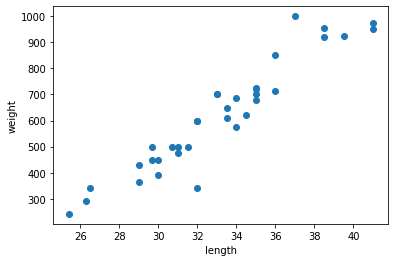

In [11]:
import matplotlib.pyplot as plt

plt.scatter(bream_length, bream_weight)  # 축지정
plt.xlabel('length')   # x축 이름
plt.ylabel('weight')   # y축 이름
plt.show()

### 도미와 빙어의 데이터를 시각화

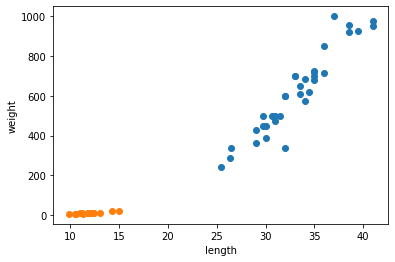

In [12]:
import matplotlib.pyplot as plt

plt.scatter(bream_length, bream_weight)  # 축지정
plt.scatter(smelt_length, smelt_weight)  # 축지정
plt.xlabel('length')   # x축 이름
plt.ylabel('weight')   # y축 이름
plt.show()

In [13]:
length = bream_length + smelt_length
weight = bream_weight + smelt_weight

In [15]:
fish_data =[[l, w] for l, w in zip(length, weight)]

In [16]:
# 도미 35마리, 빙어 14마리
fish_data

[[25.4, 242.0],
 [26.3, 290.0],
 [26.5, 340.0],
 [29.0, 363.0],
 [29.0, 430.0],
 [29.7, 450.0],
 [29.7, 500.0],
 [30.0, 390.0],
 [30.0, 450.0],
 [30.7, 500.0],
 [31.0, 475.0],
 [31.0, 500.0],
 [31.5, 500.0],
 [32.0, 340.0],
 [32.0, 600.0],
 [32.0, 600.0],
 [33.0, 700.0],
 [33.0, 700.0],
 [33.5, 610.0],
 [33.5, 650.0],
 [34.0, 575.0],
 [34.0, 685.0],
 [34.5, 620.0],
 [35.0, 680.0],
 [35.0, 700.0],
 [35.0, 725.0],
 [35.0, 720.0],
 [36.0, 714.0],
 [36.0, 850.0],
 [37.0, 1000.0],
 [38.5, 920.0],
 [38.5, 955.0],
 [39.5, 925.0],
 [41.0, 975.0],
 [41.0, 950.0],
 [9.8, 6.7],
 [10.5, 7.5],
 [10.6, 7.0],
 [11.0, 9.7],
 [11.2, 9.8],
 [11.3, 8.7],
 [11.8, 10.0],
 [11.8, 9.9],
 [12.0, 9.8],
 [12.2, 12.2],
 [12.4, 13.4],
 [13.0, 12.2],
 [14.3, 19.7],
 [15.0, 19.9]]

- 위의 데이터를 정규식으로 작성할 경우 아래와 같다

In [14]:
for l, w in zip(length, weight) :
    print(l, w)

25.4 242.0
26.3 290.0
26.5 340.0
29.0 363.0
29.0 430.0
29.7 450.0
29.7 500.0
30.0 390.0
30.0 450.0
30.7 500.0
31.0 475.0
31.0 500.0
31.5 500.0
32.0 340.0
32.0 600.0
32.0 600.0
33.0 700.0
33.0 700.0
33.5 610.0
33.5 650.0
34.0 575.0
34.0 685.0
34.5 620.0
35.0 680.0
35.0 700.0
35.0 725.0
35.0 720.0
36.0 714.0
36.0 850.0
37.0 1000.0
38.5 920.0
38.5 955.0
39.5 925.0
41.0 975.0
41.0 950.0
9.8 6.7
10.5 7.5
10.6 7.0
11.0 9.7
11.2 9.8
11.3 8.7
11.8 10.0
11.8 9.9
12.0 9.8
12.2 12.2
12.4 13.4
13.0 12.2
14.3 19.7
15.0 19.9


## fish_data 의 정답 레이블을 생성한다.

- 위에서 순서대로 35개의 데이터는 도미를 의미하고, ( 도미 = 1)
- 나머지 14개의 데이터는 빙어를 의미한다. (빙어 = 0)

In [19]:
fish_target = [1] * 35 + [0] * 14
print(fish_target)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


# K-NN 알고리즘 사용

In [17]:
# 알고리즘 모듈 호출

from sklearn.neighbors import KNeighborsClassifier

In [18]:
# 알고리즘 객체 생성

kn = KNeighborsClassifier()

In [20]:
# 학습모델링 : fit(학습용데이터, 학습용데이터의정답)
kn.fit(fish_data, fish_target)

KNeighborsClassifier()

In [21]:
# 데이터검증 : accuracy 정확도
kn.score(fish_data, fish_target)

1.0

# 데이터 시각화

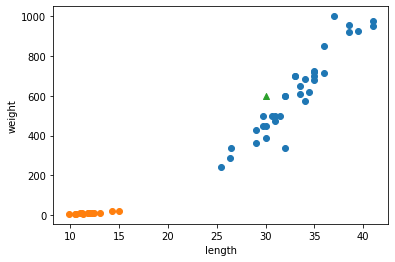

In [22]:
plt.scatter(bream_length, bream_weight)
plt.scatter(smelt_length, smelt_weight)
plt.scatter(30, 600, marker = '^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

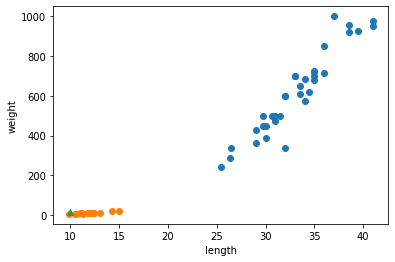

In [23]:
plt.scatter(bream_length, bream_weight)
plt.scatter(smelt_length, smelt_weight)
plt.scatter(10, 15, marker = '^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()